# Chapter 1 벡터, 파트1: 벡터와 벡터의 기본 연산

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

# 폰트 설정
%config InlineBackend.figure_format = 'retina'
plt.rcParams["axes.unicode_minus"] = False

In [8]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

## 1-1. 그림 1-2를 생성하는 코드 작성

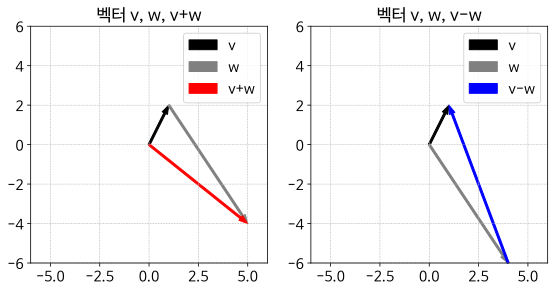

In [23]:
v = np.array([1, 2])
w = np.array([4, -6])
vPlusW = v + w
vMinusW = v - w

# subplots 생성
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].arrow(0, 0, v[0], v[1], head_width=0.3, width=0.1, color='black', length_includes_head=True)
ax[0].arrow(v[0], v[1], w[0], w[1], head_width=0.3, width=0.1, color=[0.5, 0.5, 0.5], length_includes_head=True)
ax[0].arrow(0, 0, vPlusW[0], vPlusW[1], head_width=0.3, width=0.1, color='r', length_includes_head=True)

ax[1].arrow(0,0,v[0],v[1],head_width=.3,width=.1,color='k',length_includes_head=True)
ax[1].arrow(0,0,w[0],w[1],head_width=.3,width=.1,color=[.5,.5,.5],length_includes_head=True)
ax[1].arrow(w[0],w[1],vMinusW[0],vMinusW[1],head_width=.3,width=.1,color='b',length_includes_head=True)

# 첫 번째 subplot
ax[0].grid(linestyle='--', linewidth=0.5)
ax[0].axis('square')
ax[0].set_xlim([-6, 6])
ax[0].set_ylim([-6, 6])
ax[0].legend(['v', 'w', 'v+w'])
ax[0].set_title('벡터 v, w, v+w')

# 두 번째 subplot
ax[1].grid(linestyle='--', linewidth=0.5)
ax[1].axis('square')
ax[1].set_xlim([-6, 6])
ax[1].set_ylim([-6, 6])
ax[1].legend(['v', 'w', 'v-w'])
ax[1].set_title('벡터 v, w, v-w')

plt.tight_layout()
plt.show()
     

## 1-2. 식 1-7을 코드로 변환해서 벡터 노름 계산하는 알고리즘 작성

In [42]:
def calculate_norm(max_num, size):
        vec_a = np.random.randint(0, max_num, size)
        print("랜덤 벡터 :", vec_a)
        return np.sqrt(np.sum(vec_a ** 2))

In [43]:
calculate_norm(5, 4)

랜덤 벡터 : [2 0 3 3]


4.69041575982343

In [44]:
# calculate_norm 함수를 통해 직접 계산한 norm과 np.linalg.norm 함수 사용한 결과 비교
# → 동일하다
np.linalg.norm(np.array([2, 0, 3, 3]))

4.69041575982343

## 1-3. 벡터를 입력으로 받아 동일한 방향의 단위벡터 출력하는 파이썬 함수 구현하고 영벡터 입력

In [51]:
def calculate_unit_vector(max_num, size, zero=False):
    vec_a = np.random.randint(0, max_num, size)
    if zero:
        vec_a = np.zeros((size))
    print("랜덤 벡터 :", vec_a)
    norm = np.sqrt(np.sum(vec_a ** 2))
    unit = vec_a * (1 / norm)
    return unit


In [52]:
calculate_unit_vector(5, 4)

랜덤 벡터 : [3 4 3 3]


array([0.45749571, 0.60999428, 0.45749571, 0.45749571])

In [53]:
# 단위벡터 확인 (norm=1)
np.linalg.norm(np.array([0.45749571, 0.60999428, 0.45749571, 0.45749571]))

0.9999999978189653

In [54]:
# 단위벡터 출력하는 함수에 영벡터 입력
calculate_unit_vector(5, 4, zero=True)

랜덤 벡터 : [0. 0. 0. 0.]


array([nan, nan, nan, nan])

In [55]:
# np.linalg.norm 함수 활용해서 영벡터의 단위벡터 구해본다
vector = np.zeros((4))

unit_vector = vector / np.linalg.norm(vector)
print(unit_vector)

[nan nan nan nan]


## 1-4. 벡터와 원하는 크기 입력받고 동일한 방향이지만 두번째 입력에 해당하는 크기 가진 벡터 반환

In [56]:
def calculate_changed_norm_of_vector(max_num, size, scalar):
    vec_a = np.random.randint(0, max_num, size)
    print("랜덤 벡터 :", vec_a)    

    return vec_a * scalar

In [57]:
calculate_changed_norm_of_vector(5, 3, 2)

랜덤 벡터 : [1 2 2]


array([2, 4, 4])

## 1-5. 행백터를 열벡터로 전치하는 for loop

In [89]:
def calculate_transpose(max_num, size):
    # 행벡터 vec_a
    vec_a = np.array([np.random.randint(0, max_num, size)])
    print("랜덤 벡터 :", vec_a)
    # 입력 받은 size 만큼의 비어 있는 영벡터 (행벡터)
    zero = np.zeros((size, 1))
    # 행벡터이기 때문에, .shape[1]로 차원의 갯수 가져온다
    for i in range(vec_a.shape[1]):
        zero[i, 0] = vec_a[0, i]
    
    return zero

In [90]:
calculate_transpose(5, 3)

랜덤 벡터 : [[1 4 1]]


array([[1.],
       [4.],
       [1.]])

## 1-6. 벡터 제곱 노름을 벡터 자체의 내적으로 계산

In [96]:
vec = np.random.randint(0, 5, 3)
print("랜덤 벡터:", vec)
print("벡터 자체의 내적:", np.dot(vec, vec))
print("벡터의 제곱 노름:", np.linalg.norm(vec)**2)


랜덤 벡터: [4 3 2]
벡터 자체의 내적: 29
벡터의 제곱 노름: 28.999999999999996


## 1-7. 내적의 교환 법칙 입증

In [106]:
vec_a = np.array([np.random.randint(0, 5, 3)])
vec_b = np.array([np.random.randint(0, 5, 3)])
print("벡터 a:", vec_a)
print("벡터 b:", vec_b)

atb = np.sum(np.dot(vec_a.T, vec_b))
bta = np.sum(np.dot(vec_b.T, vec_a))

print(atb)
print(bta)

벡터 a: [[1 2 4]]
벡터 b: [[1 3 1]]
35
35


## 1-8. 코드로 그림 1-6 만들기

## 1-9. 직교벡터 분해 구현

In [141]:
# 두 난수 벡터 t, r
t = np.random.randint(0, 5, 3)
r = np.random.randint(0, 5, 3)

print("벡터 t:", t)
print("벡터 r:", r)

def orthogonal_decomposition(t, r):

    # r에 대해 t의 평행 성분 계산
    parallel = r * (np.dot(t, r) / np.dot(r, r))
    print("평행 성분:", parallel)
    # 수직 성분 계산
    perpendicular = t - parallel
    print("수직 성분:", perpendicular)

    orthogonality = np.dot(parallel, perpendicular)
    return orthogonality

벡터 t: [1 1 1]
벡터 r: [2 1 3]


In [142]:
orthogonal_decomposition(t, r)

평행 성분: [0.85714286 0.42857143 1.28571429]
수직 성분: [ 0.14285714  0.57142857 -0.28571429]


1.942890293094024e-16

## 1-10. 투영 스칼라 분모가 바뀌었다면?

In [145]:
def orthogonal_decomposition_changed(t, r):

    # r에 대해 t의 평행 성분 계산
    parallel = r * (np.dot(t, r) / np.dot(t, t))
    print("평행 성분:", parallel)
    # 수직 성분 계산
    perpendicular = t - parallel
    print("수직 성분:", perpendicular)

    orthogonality = np.dot(parallel, perpendicular)
    return orthogonality

In [146]:
orthogonal_decomposition_changed(t, r)

평행 성분: [4. 2. 6.]
수직 성분: [-3. -1. -5.]


-44.0